# Présentation des données utilisées dans l'article

### Importation des modules customs

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) +'\\analyser_tools'
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from EmailDataFrame import *

C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\analyser_tools


### Modules python

In [2]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import seaborn as sns
%matplotlib inline

### Path

In [3]:
cwd = pathlib.PurePath(os.getcwd())
project_root_dir = cwd.parent
theme_path = project_root_dir / "data" / "theme_words.csv"
email_raw_path = project_root_dir / "output" / 'csv_file' / 'email_raw.csv'
facebook_url_info_path = project_root_dir / 'output' / 'csv_file' / 'facebook_urls_info.csv'
youtube_url_info_path = project_root_dir / 'output' / 'csv_file' / 'youtube_urls_info.csv'
log_file_path = project_root_dir / 'output' / 'log_file' / 'url_cleaning.log'
removed_email_path = project_root_dir / 'output' / 'csv_file' / 'removed_email_from_decrypteur.csv'

dataclean_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean'
dataclean_all_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_all'
dataclean_pre_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_pre'

corpus_em_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_em'
corpus_day_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_day'
dtm_em_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_em'
dtm_day_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_day'

output_path_graph_folder = project_root_dir / 'output' / 'graph_png'

### convertisseur de données à l'ouverture de csv pour les list-like objects

In [4]:
fb_yt_converter = {'theme': lambda x: x.strip("[]").replace("'", "").strip().split(', ')}
email_raw_converters = {"attach_type": lambda x: x.strip("[]").replace("'", "").lower().strip().split(", "),
                        "urls": lambda x: x.strip("[]").replace("'", "").strip().split(', ')
                        }

### Lire les données traiteés dans le notebook 2

In [5]:
#Load from pickle si aucune nouvelle modification 

#email
EmailDfBaseClass.read_dict_theme_from_csv(theme_path)
email_raw = EmailDF.from_csv(email_raw_path)
email_df = EmailDF.from_pickle(dataclean_pickle_path)
email_df_pre = EmailDF.from_pickle(dataclean_pre_pickle_path)
email_df_all = EmailDF.from_pickle(dataclean_all_pickle_path)


#URLS
fb_url = UrlDF.from_csv(facebook_url_info_path, parse_dates=None, converters=fb_yt_converter)
yt_url = UrlDF.from_csv(youtube_url_info_path, parse_dates=None, converters=fb_yt_converter)

#LOAD CORPUS AND DTM
corpus_em = EmailCorpus.from_pickle(corpus_em_path)
corpus_day = EmailCorpus.from_pickle(corpus_day_path)
dtm_em = EmailDTM.from_pickle(dtm_em_path)
dtm_day = EmailDTM.from_pickle(dtm_day_path)

loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_pre
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_all
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_day
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_day


## Données Descriptives pour l'introduction de l'article

### nombre courriel depuis 1er mars

In [6]:
email_df.df.shape[0]

5230

### Nombre d'urls et nombre de popularité

Nombre d'urls

In [7]:
n_url = email_df.df.urls.explode()[email_df.df.urls.explode().apply(lambda x : x!='')].shape[0]
n_url

5413

Pourcentage de chaque domaine

In [8]:
(email_df.df.domain.explode().value_counts().drop('')/n_url *100)[:20]

youtube              24.662849
facebook             21.466839
radio-canada          3.343802
google                1.459449
twitter               1.404027
ytimg                 0.831332
wordpress             0.757436
instagram             0.572695
medium                0.572695
blogspot              0.554221
redd                  0.554221
linkedin              0.517273
lapresse              0.498799
journaldemontreal     0.480325
over-blog             0.461851
tvanouvelles          0.424903
covidinfos            0.406429
lemonde               0.351007
wikipedia             0.351007
msn                   0.332533
Name: domain, dtype: float64

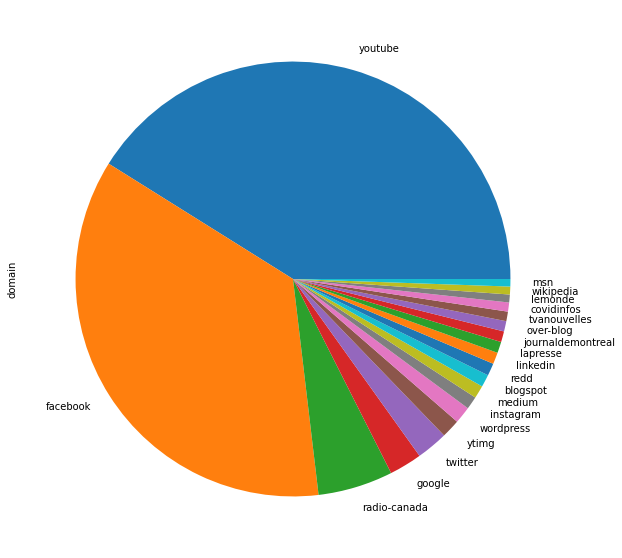

In [9]:
(email_df.df.domain.explode().value_counts().drop('')/n_url *100)[:20].plot(kind='pie', figsize=(10,10))
plt.savefig(output_path_graph_folder/'domain_pie.png', dpi=300)

## nombre de views par domaine

### facebook top 25

In [10]:
fb_url.df.sort_values('views', ascending=False)[:25]

,url,title,published_date,comments,reactions,shares,views,theme
380,https://www.facebook.com/273957870461345/,Candace Owens - Confession: I DO NOT support G...,2020-06-03T13:02:33-07:00,673919.0,833386.0,NaN,94236418.0,[]
3,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2478.0,2604.0,NaN,451752.0,"[complot, reseaux_sociaux, regions]"
19,https://www.facebook.com/904440236674180/,Radio-Québec - #STOPCONFINEMENT | Facebook,2020-04-15T14:02:06-07:00,2183.0,2253.0,NaN,268612.0,"[reseaux_sociaux, regions]"
635,https://www.facebook.com/2612548505732959/,Dr. Rashid A. Buttar - Live Stream With Dr. Ra...,2020-04-15T16:10:30-07:00,3316.0,2098.0,NaN,156791.0,[reseaux_sociaux]
101,https://www.facebook.com/567548763956869/,Radio-Québec - La grippe de 2020 | Facebook,2020-06-23T14:08:50-07:00,2742.0,2229.0,NaN,147380.0,"[virus, reseaux_sociaux, regions]"
711,https://www.facebook.com/893899171048179/,🚨🚨🚨🚨🚨🚨FLASH INFO CORONAVIRUS 🚨🚨🚨🚨🚨🚨🚨 - Frank B...,2020-03-25T09:41:47-07:00,958.0,1868.0,NaN,109688.0,"[virus, politique]"
6,https://www.facebook.com/10163425830315501/,Claude Gélinas - Claude Gélinas was live.,2020-05-15T09:42:06-07:00,559.0,794.0,NaN,59115.0,[]
133,https://www.facebook.com/10207793456470477/,Josée Turmel - La suite...j'ai manqué de batte...,2020-05-28T16:26:18-07:00,325.0,497.0,NaN,34750.0,[]
61,https://www.facebook.com/10163730984880501/,Claude Gélinas - Claude Gélinas was live.,2020-07-12T21:47:32-07:00,888.0,429.0,NaN,21059.0,[]
612,https://www.facebook.com/10164022041430434/,Val-David se lève! - William James Rochford,2020-06-07T11:22:47-07:00,96.0,104.0,NaN,10027.0,[]


### Top 25 facebook selon le nombre de commentaires

In [11]:
fb_url.df.sort_values('comments', ascending=False)[:25]

,url,title,published_date,comments,reactions,shares,views,theme
380,https://www.facebook.com/273957870461345/,Candace Owens - Confession: I DO NOT support G...,2020-06-03T13:02:33-07:00,673919.0,833386.0,NaN,94236418.0,[]
322,https://www.facebook.com/1523511527824585/,An0maly - Can Viruses Be Man-Made? | Facebook,2020-03-18T11:18:44-07:00,35461.0,193918.0,361472.0,NaN,[reseaux_sociaux]
733,https://www.facebook.com/511772752936235/,France 2 - Chine : des citoyens notés en fonct...,2019-10-10T08:33:02-07:00,34191.0,75769.0,157578.0,NaN,"[reseaux_sociaux, europe, chine]"
334,https://www.facebook.com/2671555386492296/,Occupy Democrats - 🔥Republican SHREDS Trump: T...,NaN,33501.0,139694.0,221717.0,NaN,"[reseaux_sociaux, usa]"
609,https://www.facebook.com/227648325147160/,Chris Cuomo - You have to fight back. I’m not ...,2020-04-06T20:14:50-07:00,29247.0,101965.0,75260.0,NaN,[]
558,https://www.facebook.com/3016120575119541/,NowThis - Chris Cuomo Reveals Wife Cristina Te...,2020-04-16T13:00:42-07:00,21054.0,134334.0,44416.0,NaN,"[virus, reseaux_sociaux]"
363,https://www.facebook.com/565061731036691/,Anna Ita - Afghanistan: un enfant de 9 ans don...,2020-06-17T04:01:07-07:00,19924.0,26177.0,108431.0,NaN,[]
324,https://www.facebook.com/3355329144495502/,"Loopsider - Dans cette région de l'Equateur, d...",2020-04-08T04:56:59-07:00,14019.0,69630.0,156647.0,NaN,[reseaux_sociaux]
181,https://www.facebook.com/3446793915347916/,NaN,2020-04-05T23:01:28-07:00,10911.0,19177.0,62330.0,NaN,[]
78,https://www.facebook.com/10220333495740251/,Leroy Jenkins - 🍿COVID 911:The DEEP STATE insu...,2020-06-28T14:19:52-07:00,10612.0,29427.0,103014.0,NaN,[qanon]


### Top 25 des urls facebook les plus partagés dans les courriels

In [12]:
top_fb_urls_in_email = email_df.df.urls.explode()[email_df.df.domain.explode() == 'facebook'].value_counts()[:25]
top_fb_urls_in_email

https://www.facebook.com/2435648836745547/      13
https://www.facebook.com/10220634658009043/     12
https://www.facebook.com/10157174841211106/     10
https://www.facebook.com/groups/decrypteurs/     8
https://www.facebook.com/10157174739631106/      7
https://www.facebook.com/221750599238300/        7
https://www.facebook.com/10163425830315501/      6
https://www.facebook.com/1170890569958096/       6
https://www.facebook.com/4696237033735338/       6
https://www.facebook.com/1952307158131536/       5
https://www.facebook.com/3004250292972420/       5
https://www.facebook.com/669008923670898/        5
https://www.facebook.com/3148558748511356/       5
https://www.facebook.com/226913052006274/        5
https://www.facebook.com/110766340380387/        5
https://www.facebook.com/3046035462289522/       5
http://www.facebook.com                          5
https://www.facebook.com/100012965373412/        4
https://www.facebook.com/10158512010107774/      4
https://www.facebook.com/7jours

### le nombre de vues de ces videos

In [13]:
data_fb_top_25 = fb_url.df[fb_url.df.url.apply(lambda u : u in top_fb_urls_in_email.index.values)]
data_fb_top_25

,url,title,published_date,comments,reactions,shares,views,theme
0,https://www.facebook.com/2435648836745547/,7 jours sur Terre - L'OMS: une organisation cr...,2020-04-14T20:48:18-07:00,835.0,5293.0,9353.0,NaN,"[reseaux_sociaux, politique]"
1,https://www.facebook.com/10220634658009043/,Écouter ça avant de vous faire tester ou... - ...,2020-07-20T04:23:32-07:00,973.0,1415.0,12013.0,NaN,[]
2,https://www.facebook.com/groups/decrypteurs/,Décrypteurs Public Group | Facebook,NaN,NaN,NaN,NaN,NaN,[reseaux_sociaux]
3,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2478.0,2604.0,NaN,451752.0,"[complot, reseaux_sociaux, regions]"
4,https://www.facebook.com/4696237033735338/,Studio Théovox - Masque &amp; Covid / La persp...,2020-07-08T13:54:31-07:00,3166.0,6182.0,26838.0,NaN,"[virus, masque, reseaux_sociaux]"
5,https://www.facebook.com/1170890569958096/,Studio Théovox - Masque &amp; Covid / La persp...,NaN,30.0,351.0,63.0,NaN,"[virus, masque, reseaux_sociaux]"
6,https://www.facebook.com/10163425830315501/,Claude Gélinas - Claude Gélinas was live.,2020-05-15T09:42:06-07:00,559.0,794.0,NaN,59115.0,[]
7,https://www.facebook.com/3148558748511356/,Ghislaine Ryan - 🤬🤬🤬🤬🤬🤬 | Facebook,NaN,0.0,4.0,2.0,NaN,[reseaux_sociaux]
8,https://www.facebook.com/1952307158131536/,Facebook,NaN,NaN,NaN,NaN,NaN,[reseaux_sociaux]
9,https://www.facebook.com/669008923670898/,Facebook,NaN,NaN,NaN,NaN,NaN,[reseaux_sociaux]


### Commentaires, réaction et partages

In [15]:
data_fb_top_25[['comments', 'reactions', 'shares', 'views']].sum()

comments      12262.0
reactions     26897.0
shares        83130.0
views        779479.0
dtype: float64

## youtube

In [16]:
yt_url.df.sort_values('views', ascending=False)[:25]

,url,title,date_published,description,author,rating,views,theme
119,https://www.youtube.com/watch?v=6Af6b_wyiwI,The next outbreak? We’re not ready | Bill Gates,2015-04-03,Visit http://TED.com to get our entire library...,TED,4.799814,30578901.0,"[traitement, reseaux_sociaux, reste_du_monde]"
334,https://www.youtube.com/watch?v=sjDuwc9KBps,PSA Grocery Shopping Tips in COVID-19 (See Imp...,NaN,www.DrJeffVW.com UPDATE: C.D.C. Recommends Ame...,Jeffrey VanWingen,4.888283,26183274.0,"[virus, reseaux_sociaux]"
391,https://www.youtube.com/watch?v=TPpoJGYlW54,How wildlife trade is linked to coronavirus,2020-03-06,And why the disease first appeared in China. N...,Vox,4.787058,22539559.0,"[virus, experts, reseaux_sociaux, chine, reste..."
455,https://www.youtube.com/watch?v=DPDPzbLFeP4,A SPOONFUL OF CLOROX - A Randy Rainbow Song Pa...,2020-04-25,THE RANDY RAINBOW SHOW Executive Producer: RAN...,Randy Rainbow,4.874081,6584139.0,[reseaux_sociaux]
407,https://www.youtube.com/watch?v=gvuulZPbfBg,Michelle Obama a Man?,2014-03-19,Thumps up and thumbs down are hilarious... Bar...,MrPurpleTie,3.073156,6083479.0,[reseaux_sociaux]
107,https://www.youtube.com/watch?v=HhNo_IOPOtU,How to Significantly Slow Coronavirus? #Masks4...,2020-03-27,EDIT: Big news! WHO is changing its position a...,Petr Ludwig / Konec prokrastinace [CZE],4.872428,5726038.0,"[virus, experts, reseaux_sociaux, politique, r..."
68,https://www.youtube.com/watch?v=xf-qv9o8nq8,Top Doctor EXPOSES EVERYTHING The Deep State I...,2020-03-30,"Dr. Shiva Ayadurai, the inventor of email and ...",FREE PLEASURES WORLDWIDE,4.754799,5655786.0,"[virus, traitement, reseaux_sociaux, 5g, chine]"
285,https://www.youtube.com/watch?v=sPrbGU0Wyh4,Tucker: Big Tech censors dissent over coronavi...,2020-04-28,Big technology companies are using the COVID-1...,Fox News,4.856134,4456757.0,"[virus, reseaux_sociaux, usa]"
237,https://www.youtube.com/watch?v=rQRvDBgwb20,Gravitas: Wuhan CoronaVirus | Pictures that Ch...,2020-03-30,Gravitas: Wuhan CoronaVirus | Pictures that Ch...,WION,4.767463,4404912.0,"[virus, reseaux_sociaux, chine, reste_du_monde]"
11,https://www.youtube.com/watch?v=3bXWGxhd7ic,"The first documentary movie on CCP virus, Trac...",2020-04-07,As the world is gripped by the ongoing pandemi...,NTD,4.732682,4400852.0,"[virus, experts, reseaux_sociaux, politique, c..."


### Leurs thèmes

In [17]:
yt_url.df.sort_values('views', ascending=False)[:25].theme.explode().value_counts().drop('')

reseaux_sociaux    22
virus              18
reste_du_monde     14
chine              11
experts             6
politique           6
laboratoire         4
traitement          3
5g                  2
bilan               1
usa                 1
europe              1
Name: theme, dtype: int64

### top 25 des urls youtube les plus mentionnées dans les courriels

In [18]:
top_yt_urls_in_email = top_fb_urls_in_email = email_df.df.urls.explode()[email_df.df.domain.explode() == 'youtube'].value_counts()[:25]
top_yt_urls_in_email

https://www.youtube.com/watch?v=7t82PZcp-4A    110
https://www.youtube.com/watch?v=DH7Ot3DrmX4     44
https://www.youtube.com/watch?v=izzadeWl3b0     34
https://www.youtube.com/watch?v=l941UaL913c     33
https://www.youtube.com/watch?v=aqIZbyZJRZE     31
https://www.youtube.com/watch?v=giyZvits7DU     28
https://www.youtube.com/watch?v=PL-49LSFKhw     25
https://www.youtube.com/watch?v=VjlDLSemGd0     19
https://www.youtube.com/watch?v=AEYHofyP3x4     14
https://www.youtube.com/watch?v=SEMWLibvGDc     14
https://www.youtube.com/watch?v=WW3jEzUc-CQ     13
https://www.youtube.com/watch?v=c77Wgp1mQew     12
https://www.youtube.com/watch?v=3bXWGxhd7ic     11
https://www.youtube.com/watch?v=u33VXrcrd4Y     11
https://www.youtube.com/watch?v=Fvp6uah-2hY     10
https://www.youtube.com/watch?v=Z5kA6iBpYR4     10
https://www.youtube.com/watch?v=m8HF4GXjsP8      9
https://www.youtube.com/watch?v=RDBhByCrMIY      9
https://www.youtube.com/watch?v=4eCQUoOUKhE      9
https://www.youtube.com/watch?v

### leurs données

In [19]:
data_yt_top_25 = yt_url.df[yt_url.df.url.apply(lambda u : u in top_yt_urls_in_email.index.values)]
data_yt_top_25

,url,title,date_published,description,author,rating,views,theme
0,https://www.youtube.com/watch?v=7t82PZcp-4A,"Coronavirus, dangers immédiats et futurs",2020-03-23,ABONNE-TOI! https://www.instagram.com/4ovet24/...,4ovet24,4.495832,2058743.0,"[virus, reseaux_sociaux]"
1,https://www.youtube.com/watch?v=DH7Ot3DrmX4,#COVID19: La FRAUDE STATISTIQUE confirmée.,2020-04-10,Les représentants des services sanitaires conf...,Radio-Québec,4.693275,538373.0,"[virus, bilan]"
2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.347704,906916.0,"[virus, complot, experts, reseaux_sociaux, reg..."
3,https://www.youtube.com/watch?v=l941UaL913c,Le professeur Luc Montagner prix Nobel de méde...,2020-04-17,"La mascarade est finie, depuis des semaines be...",YellowFlagsInfos News,4.714286,325222.0,"[complot, reseaux_sociaux, politique, chine, r..."
4,https://www.youtube.com/watch?v=aqIZbyZJRZE,NaN,NaN,NaN,NaN,NaN,NaN,[]
5,https://www.youtube.com/watch?v=giyZvits7DU,NaN,NaN,NaN,NaN,NaN,NaN,[]
6,https://www.youtube.com/watch?v=PL-49LSFKhw,NaN,NaN,NaN,NaN,NaN,NaN,[]
7,https://www.youtube.com/watch?v=VjlDLSemGd0,Coronavirus: libérez vous du mensonge,2020-03-24,On nous ment sur la réalité de la situation. L...,EVRARD,4.264582,229846.0,"[virus, traitement, bilan, experts, reseaux_so..."
8,https://www.youtube.com/watch?v=AEYHofyP3x4,Chloroquine: Le complexe médiatico-médical imp...,2020-03-25,Trump a réussi à déjouer les plan de l'État pr...,Radio-Québec,4.882448,200442.0,"[virus, traitement, politique, usa, qanon]"
9,https://www.youtube.com/watch?v=WW3jEzUc-CQ,NaN,NaN,NaN,NaN,NaN,NaN,[]


### Près de la moitié (n=11) des videos les plus partagés (top 25) sont maintenant supprimé de youtube.

In [20]:
data_yt_top_25.title.isnull().sum()

11

### Le top 25 des videos les plus partagés dans les courriels cumulents 10,534,646 de vues sans compter ceux qui sont supprimés...


In [21]:
data_yt_top_25['views'].sum()

10381879.0

In [22]:
data_yt_top_25.theme.explode().value_counts().drop('')

virus              11
reseaux_sociaux     7
politique           6
experts             5
reste_du_monde      5
bilan               4
chine               3
complot             3
regions             2
traitement          2
usa                 2
europe              2
masque              1
qanon               1
Name: theme, dtype: int64

## Conclusion

- Les videos youtube peuvent rejoindre beaucoup de personnes (10M) avec des video datant du mois de mars et avril seulement
- Plusieurs urls youtube populaire dans les courriels sont supprimés (11 du top 25)
- Les posts facebook ont succité beaucoup d'interactions (11 278 commentaires, 25 105 réactions, 64 394 partages et 779 479 vues)


## Combien de courriels taggé

In [64]:
email_df.df.theme.apply(lambda x: len(x) == 0).sum()/5320 *100

10.281954887218046

In [ ]:
n_theme = len(email_df.theme.keys()) #nombre de theme
n_email = email_df.df.shape[0]
data = {i:email_df.df.theme.apply(lambda x: len(x) == i).sum() for i in range(0,n_theme)}
s = pd.Series(data)
ax = s.plot(figsize=(10,5), kind='bar', title='distribution du nombre de courriel avec x theme')
ax.set_xlabel('nombre de thème')
ax.set_ylabel('nombre de courriel avec x thème')
plt.savefig(output_path_graph_folder/'dist_email_tag_count.png', dpi=300)
plt.show()


## Analayse des données pré-post 1er mars

### voir tendance des thèmes en incluant les données avant le 1er mars.

In [ ]:
def plot_theme_per_day(theme_per_day, theme, n_col=5, save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_row = math.ceil(len(theme.keys()) / 5)  # nomber of row to show all plot with n_col
    fig, axs = plt.subplots(n_row, 5, figsize=(30, 15), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)

    axs = axs.ravel()

    for i, theme in enumerate(theme.keys()):
        s = theme_per_day[theme]  # word and count value
        days = s.index
        values = s.values

        axs[i].plot(days, values)
        axs[i].set_title(theme)

        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)

    if save:
        plt.savefig('theme_per_day.png', dpi=300)

### TOUTES LES DATES

In [27]:
def plot_theme_per_day(theme_per_day, theme, n_col=5, save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_row = math.ceil(len(theme.keys()) / 5)  # nomber of row to show all plot with n_col
    fig, axs = plt.subplots(n_row, 5, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)

    axs = axs.ravel()

    for i, theme in enumerate(theme.keys()):
        s = theme_per_day[theme]  # word and count value
        days = s.index
        values = s.values

        axs[i].plot(days, values)
        axs[i].set_title(theme)

        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)

    if save:
        plt.savefig('theme_per_day.png', dpi=300)

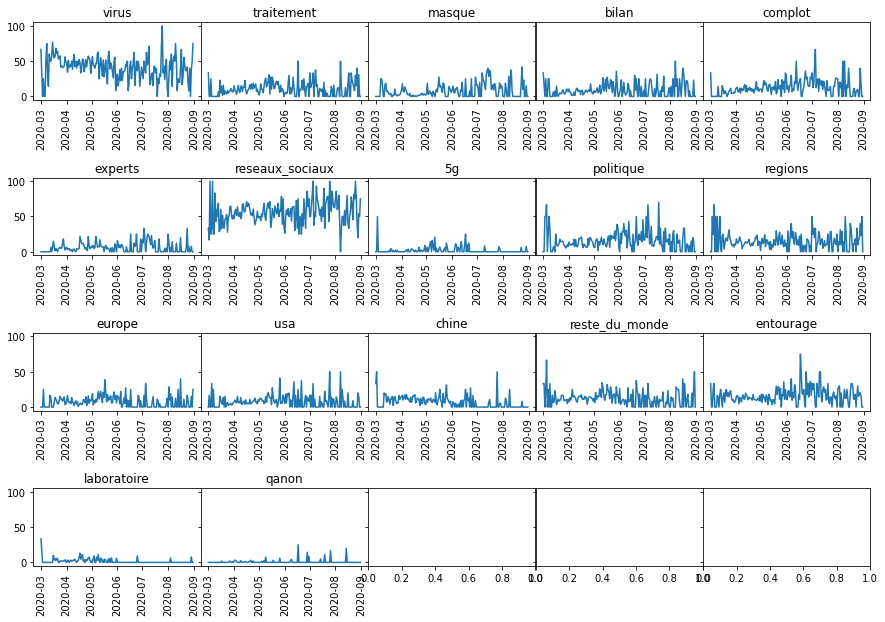

In [30]:
plot_theme_per_day(email_df.theme_per_day(), email_df.theme)

### La tendance de réseaux sociaux est à la hausse en réalité, pas constante. Celle de virus est plutôt à la baisse, bien que très élevé.

In [26]:
# theme = 'chine'
# fig, axes = plt.subplots(3,1, sharex=True, figsize=(20,10))
# email_df.email_per_day.plot(ax =axes[0], label='Tout')
# email_df.theme_per_day(pourc=False)[theme].plot(label=theme, ax =axes[1])
# email_df.theme_per_day()[theme].plot(label=theme, ax =axes[2])
# for ax in axes:
#     ax.legend(loc='best')

# for ax in axes[:2]:
#     ax.set_ylim([0,135])
# axes[2].set_ylim([0,100])

# axes[0].set_ylabel('nombre de courriel par jour')
# axes[1].set_ylabel('nombre de courriel par jour')
# axes[2].set_ylabel('pourcentage de courriel par jour')
# axes[2].set_xlabel('Date')
# fig.suptitle(f"Représentation du nombre de courriel par jour avec le thème {theme}", fontsize=16)
# plt.show()
# plt.savefig(output_path_graph_folder/f'{theme}.png', dpi=300)


### Conclusion

- Virus a eu une augmentation fulgurante à partir du 1er mars et la tendance est à la baisse.
- Réseaux sociaux es toujours aussi important.
- Complot semble être en augmentation en pourcentage de courriel, tout comme entourgage bien que ce dernier soit moins marqué.



## ORIGINE DU VIRUS

### Combien de courriel mentionnait virus entre mars et avril ou mars et mai

In [31]:
c_v = email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'virus'], condition ='and').df.shape[0]
c_l =  email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'laboratoire'], condition ='and').df.shape[0]
c_v_l = email_df.filt_by_date((2020,3,31),(2020,4,30)).filt('theme', with_values=['chine', 'laboratoire', 'virus'], condition ='and').df.shape[0]

print('chine et virus', c_v)
print('chine et laboratoire', c_l)
print('chine et virus et laboratoire', c_v_l)

chine et virus 191
chine et laboratoire 48
chine et virus et laboratoire 44


### quand retrouve-t-on ces courriels

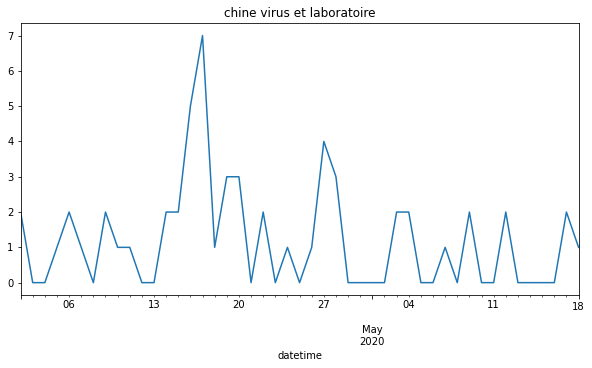

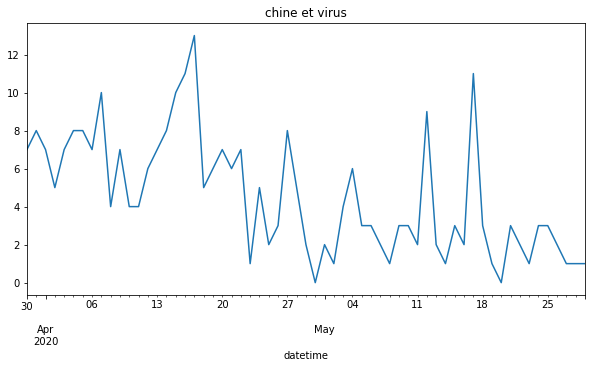

In [32]:
email_df.filt_by_date((2020,3,30),(2020,5,30)).filt('theme', with_values=['chine', 'virus', 'laboratoire'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot(figsize=(10,5), title = 'chine virus et laboratoire')
plt.show()
email_df.filt_by_date((2020,3,30),(2020,5,30)).filt('theme', with_values=['chine', 'virus'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot(figsize=(10,5), title='chine et virus')
plt.show()

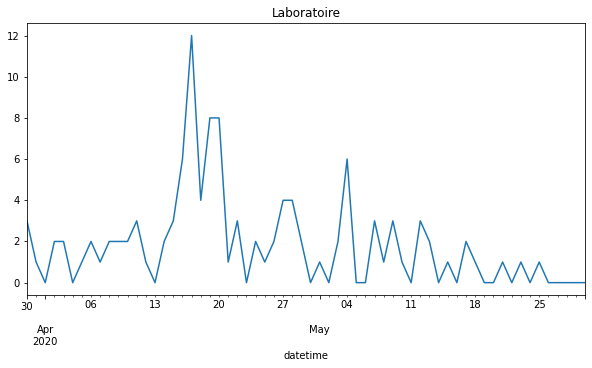

In [33]:
email_df.theme_per_day(pourc=False)['laboratoire'].loc['2020-3-30':'2020-5-30'].plot(figsize=(10,5), title = 'Laboratoire')

### Moments de la mention de la video avec luc montagner

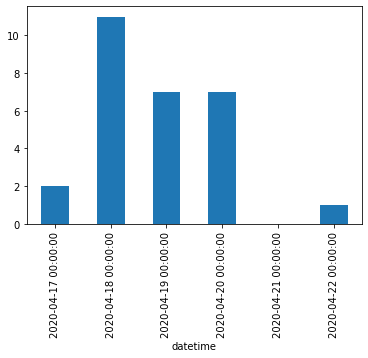

In [34]:
email_df.filt('urls', with_values=['https://www.youtube.com/watch?v=l941UaL913c']).df.set_index('datetime').resample('D').count().email_id.plot(kind='bar')

### conclusion

- à la mi-avril (13-20 avril) y a eu des questionnement sur l'origine du virus de façon plus importante.
- ça concorde bien avec la sortie du vidéo de luc montagner le 17 avril qui a eu 320k de vues et mentionné 28 fois dans les courriels aux dates suivantes

- ET avec google trend pour les mots Luc Montagner  : https://trends.google.com/trends/explore?geo=CA&q=Luc%20Montagner


Entre le 31 mars et le 30 avril
- 191 courriels avaient les thèmes chine ET virus
- 48 courriels avaient les thème chine et laboratoire
- 44 courriels avaient chine, virus ET laboratoire


## Thème en croissance? Est-ce que complot et entourage sont corrélés?

In [35]:
complot = email_df.theme_per_day()['complot']
entourage = email_df.theme_per_day()['entourage']
idx = np.arange(0,len(complot),1)

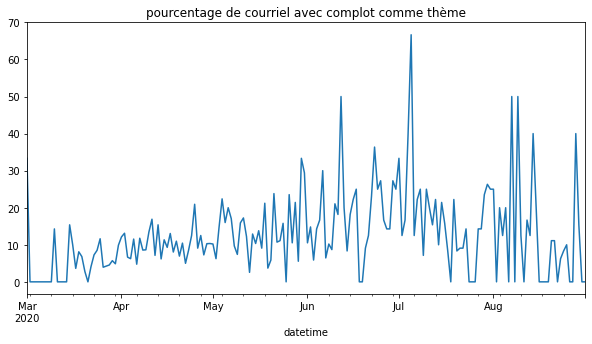

In [36]:
complot.plot(label='complot', title = 'pourcentage de courriel avec complot comme thème', figsize=(10,5))


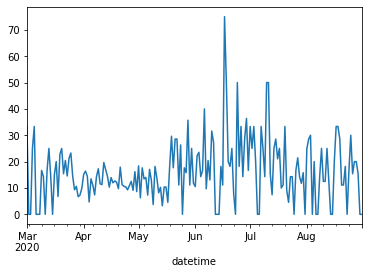

In [37]:
entourage.plot()

In [38]:
complot = email_df.theme_per_day()['complot']
entourage = email_df.theme_per_day()['entourage']
idx = np.arange(0,len(complot),1)

Pour faire un test de pearson R, on doit s'assuré que la distribution est normale pour les deux variables d'intérêts

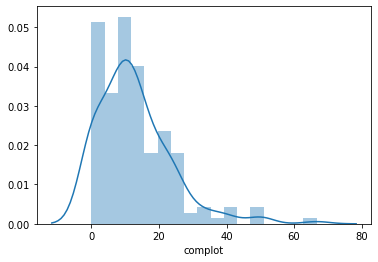

In [39]:
sns.distplot(complot)
plt.show()

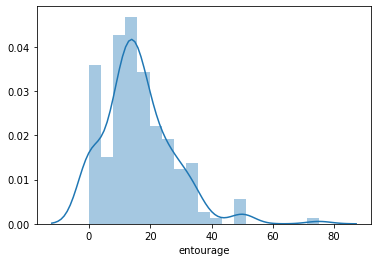

In [40]:
sns.distplot(entourage)
plt.show()

Les deux variable semblent normalement distribués dans le temps, regardons la valeur de corrélation

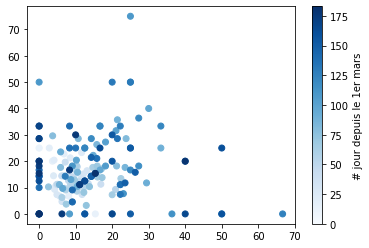

In [41]:
plt.scatter(complot.values, entourage.values, c=idx, cmap=plt.cm.Blues)
cb = plt.colorbar(label = '# jour depuis le 1er mars')


In [42]:
np.corrcoef(complot.values, entourage.values)

array([[1.        , 0.11787941],
       [0.11787941, 1.        ]])

La corrélation est faible (peason r = 0.14), par contre les deux themes ont une tendance à la hausse en pourcentage de courriel

On voit en effet une légère inflection, tendance vers l'exponnetielle qui témoigne de l'augmentation du thème complot depuis mars.

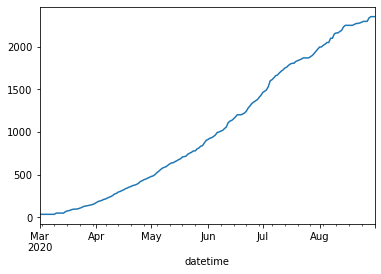

In [43]:
complot.cumsum().plot()
plt.show()

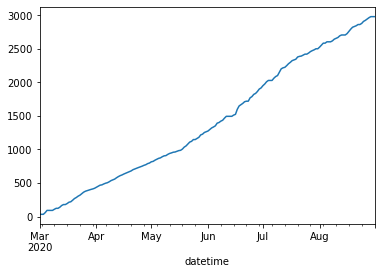

In [44]:
entourage.cumsum().plot()

### Conclusion

- Complot et entourage sont faiblement corrélé de mars à août.
- Complot a une tendance plus forte à la hausse qu'entourage.

## Complot Bilan 

In [45]:
complot =  email_df.filt('theme', with_values=['complot'], condition ='and').df
bilan =  email_df.filt('theme', with_values=['bilan'], condition ='and').df
c_b = email_df.filt('theme', with_values=['complot', 'bilan'], condition ='and').df.shape[0]
c_b_v = email_df.filt('theme', with_values=['complot', 'bilan', 'virus'], condition ='and').df.shape[0]

print('complot', complot.shape[0])
print('bilan', bilan.shape[0])
print('complot et bilan', c_b)
print('complot et bilan et virus', c_b_v)

complot 566
bilan 419
complot et bilan 67
complot et bilan et virus 57


### complot apparaît quand?

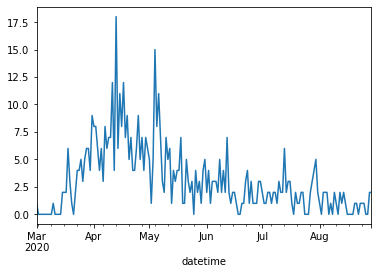

In [46]:
complot.set_index('datetime').resample('D').count().email_id.plot()

In [47]:
### bilan apparaît quand?

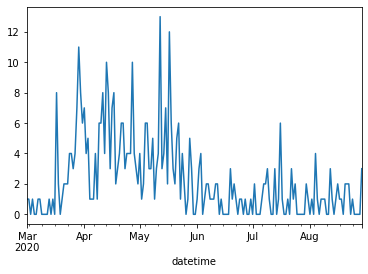

In [48]:
bilan.set_index('datetime').resample('D').count().email_id.plot()

### bilan et complot apparaissent quand ?

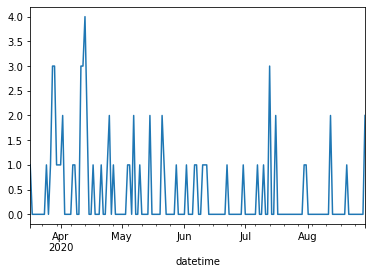

In [49]:
email_df.filt('theme', with_values=['complot', 'bilan'], condition ='and').df.set_index('datetime').resample('D').count().email_id.plot()

### combien de vues ont cumulé les vidéos parlant de bilan?

In [50]:
vid_bilan = email_df.filt('theme', with_values=['bilan'], condition ='and').df.urls.explode().value_counts().drop('')[:10].index.values

In [51]:
yt_bilan = yt_url.df[yt_url.df.url.apply(lambda u : u in vid_bilan)]
fb_bilan = fb_url.df[fb_url.df.url.apply(lambda u : u in vid_bilan)]

In [52]:
yt_bilan

,url,title,date_published,description,author,rating,views,theme
1,https://www.youtube.com/watch?v=DH7Ot3DrmX4,#COVID19: La FRAUDE STATISTIQUE confirmée.,2020-04-10,Les représentants des services sanitaires conf...,Radio-Québec,4.693275,538373.0,"[virus, bilan]"
2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.347704,906916.0,"[virus, complot, experts, reseaux_sociaux, reg..."
5,https://www.youtube.com/watch?v=giyZvits7DU,NaN,NaN,NaN,NaN,NaN,NaN,[]
16,https://www.youtube.com/watch?v=m8HF4GXjsP8,Victoire! la volte-face du gouvernement.,2020-04-24,Le Gouv. Legault CONFIRME l'analyse de radio-Q...,Radio-Québec,4.806006,241245.0,"[virus, bilan, complot, politique, regions]"
34,https://www.youtube.com/watch?v=rYkAMmEWxgc,parents vos enfants sont en danger de mort !,2020-04-01,NEWSLETTER GRATUITE: https://www.santeglobale....,Tal Schaller,4.783173,200465.0,"[virus, reseaux_sociaux, reste_du_monde]"
51,https://www.youtube.com/watch?v=TCujLL1aeKU,"Même sans pandémie, il y a 1000 décès par mois...",2020-04-29,Cet extrait aide à comprendre que dans les CHS...,Jean-Paul Labelle,4.277778,42746.0,"[virus, bilan]"


In [53]:
fb_bilan

,url,title,published_date,comments,reactions,shares,views,theme
1,https://www.facebook.com/10220634658009043/,Écouter ça avant de vous faire tester ou... - ...,2020-07-20T04:23:32-07:00,973.0,1415.0,12013.0,NaN,[]
3,https://www.facebook.com/221750599238300/,Radio-Québec - #COVID19: La FRAUDE STATISTIQUE...,2020-04-10T14:01:01-07:00,2478.0,2604.0,NaN,451752.0,"[complot, reseaux_sociaux, regions]"


In [54]:
yt_bilan.views.sum()

1929745.0

In [55]:
fb_bilan.views.sum()

451752.0

### c'est 2.5 millions de vues qu'on cumulé les vidéos du top 10 des urls les plus mentionnées dans les courriels à propos de bilan

## À propos de EVRARD

In [56]:
yt_url.df[yt_url.df.author == 'EVRARD']

,url,title,date_published,description,author,rating,views,theme
2,https://www.youtube.com/watch?v=izzadeWl3b0,Coronavirus: les chiffres sont faux,2020-03-28,Les chiffres qu'on nous présente sont faux. C'...,EVRARD,4.347704,906916.0,"[virus, complot, experts, reseaux_sociaux, reg..."
7,https://www.youtube.com/watch?v=VjlDLSemGd0,Coronavirus: libérez vous du mensonge,2020-03-24,On nous ment sur la réalité de la situation. L...,EVRARD,4.264582,229846.0,"[virus, traitement, bilan, experts, reseaux_so..."


In [57]:
yt_url.df[yt_url.df.author == 'EVRARD'].views.sum()

1136762.0

## OMS

In [58]:
num_email_with_word_oms = email_df.filt('text', with_values=['oms']).df.shape[0]
num_email_with_word_oms_and_theme_complot = email_df.filt('text', with_values=['oms']).filt('theme', with_values=['complot']).df.shape[0]
email_oms = email_df.filt('text', with_values=['oms'])
email_oms_complot = email_df.filt('text', with_values=['oms']).filt('theme', with_values=['complot'])

In [59]:
print(f"Il y a {num_email_with_word_oms} courriel avec le mot 'OMS' et de ces {num_email_with_word_oms}, {num_email_with_word_oms_and_theme_complot} abordent la thématique complot")

Il y a 47 courriel avec le mot 'OMS' et de ces 47, 11 abordent la thématique complot


In [60]:
email_oms.df.theme.explode().value_counts()

virus              31
reseaux_sociaux    21
politique          20
reste_du_monde     16
regions            12
entourage          11
complot            11
traitement         10
usa                 8
chine               7
europe              7
bilan               6
laboratoire         3
experts             3
qanon               1
Name: theme, dtype: int64

In [61]:
email_oms.df.urls.explode().value_counts().drop('')

https://www.youtube.com/watch?v=s5hxuk1oNI8                                                                                                                    6
https://www.linkedin.com/in/janhvimbhojwani                                                                                                                    3
https://issues.fr/allemagne-deuxieme-vague-confinement/?fbclid=IwAR0XTR3gt4t-2udXZ3lqDa0yIJxjwOm7gSGr0LfkdO311xIba1bUndn3PB0                                   3
https://www.senscritique.com/livre/La_deprogrammation/22554062/actualites                                                                                      3
https://www.facebook.com/covidinfos.net                                                                                                                        2
                                                                                                                                                              ..
https://www.amazon.fr/dp/165135272

### COVIDINFO

In [63]:
email_df.filt('domain', with_values=['covidinfos'])

### Legault et Trudeau

In [ ]:
email_df.filt('text', with_values=['legault'], condition='or').df.urls.explode()

### Experts

In [ ]:
email_df.groupby_theme(prop=False)

In [ ]:
email_df.filt('urls', with_values=['https://www.youtube.com/watch?v=7t82PZcp-4A']).df.set_index('datetime').resample('D').count().email_id.loc['2020-3-26':'2020-03-28'].sum()

In [ ]:
email_df.email_per_day.loc['2020-3-26':'2020-03-28'].sum()

### N95

In [ ]:
df = email_df.df.set_index('datetime').loc['2020-4-1':'2020-4-15']

In [ ]:
df.urls.explode()[df.domain.explode() == 'facebook'].value_counts()

### 5G

In [ ]:
email_df.filt('theme', with_values=['5g']).df.set_index('datetime').resample('D').count().email_id.